DSC1 100 003 - Personal Project Planning Stage 

Tanveen Brar

11.12.2025

Predicting Player Engagement on a Minecraft Research Server: 

This project explores player engagement within a Minecraft researcher server. My goal in this planning stage is to summarize the dataset, identify a clear question to investigate, and outline a modelling plan for the final group project. The dataset, players.csv, contains demographic and behavioural information for 196 players. I am interested in whether newsletter subscription leads to higher engagement through the total hours played.



In [19]:
library(tidyverse)
library(janitor)

players <- read_csv("players.csv")
glimpse(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


Data Description:

The dataset has 196 observations and 7 variables which are:
- experience (categorical): Amateur, Beginner, Pro, Regular, Veteran
- subscribe (logical): TRUE/FALSE 
- hashedEmail (character)
- played_hours (numeric): total time spent playing
- name (character)
- gender (categorical): Male/Female
- Age (numeric): age in years 

No duplicated rows were found and the only missing data occurs in Age, (2 values). 

In [20]:
summary(players)
colSums(is.na(players))

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

The played_hours variable is highly right-skewed, ranging from 0 to 223.10 hours, with a mean of 8.85 and a median of 0.10. Most players participated for a short amount of time while a small number was extremely active. These characteristics make the dataset suitable for exploring differences between subscribed and unsubscribed players. 

Research Questions:

Broad Question: How do demographic and behavioural characteristics relate to player engagement on the Minecraft server?

Specific Question: Are subscribed players more active than unsubscribed players in terms of total playing hours?


This question is useful because subscription may indicate higher interest, making it a meaningful behavioural predictor. This relationship is interesting to explore because it reveals how voluntary engagement behaviours relate to actual play activity on the server.

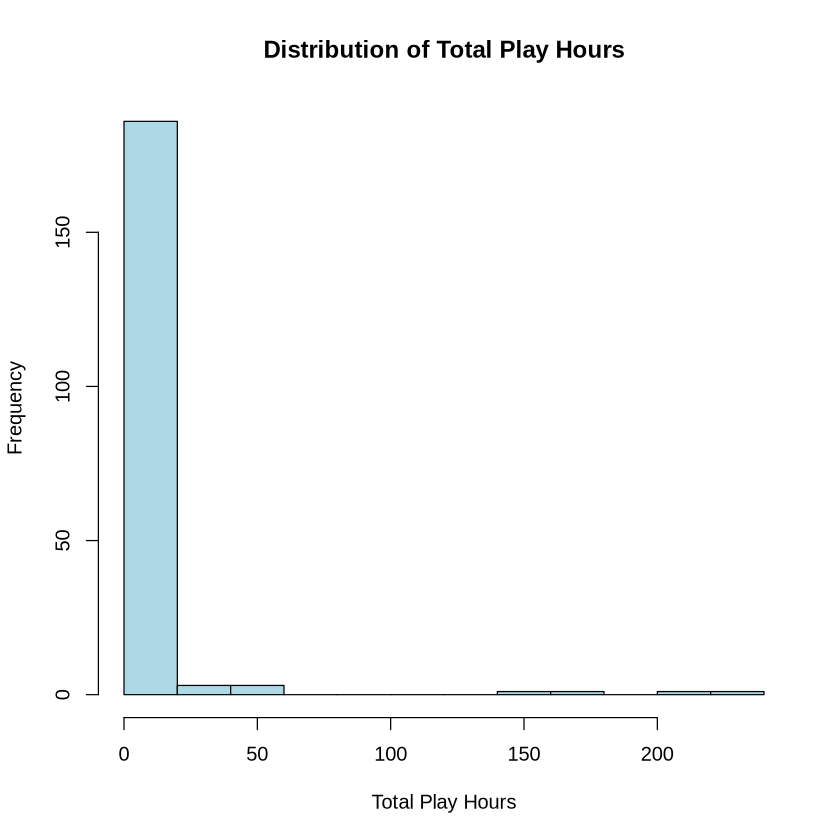

In [23]:
hist(players[["played_hours"]],
     main = "Distribution of Total Play Hours",
     xlab = "Total Play Hours",
     col = "lightblue",
     border = "black")

The histogram shows that the total play hours are right-skewed, showing most players logged on for less than one hour on the server, while a small number played for longer times. The long right tail shows that there are high-value outliers and that can indicate the player engagement varies across the participants.

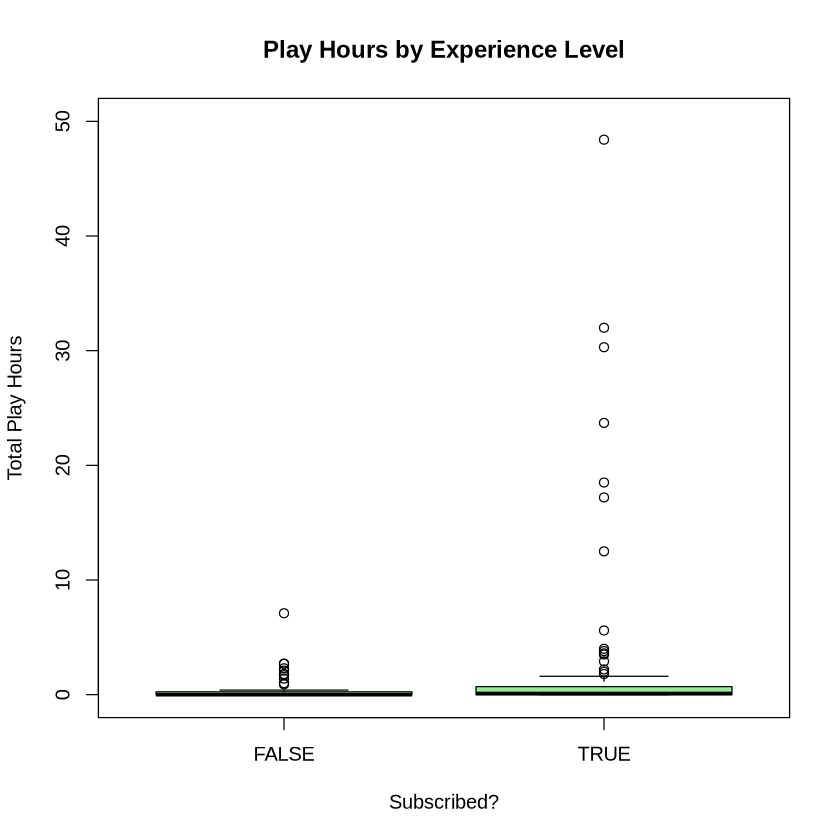

In [24]:
boxplot(played_hours ~ subscribe, 
        data = players, 
        main = "Play Hours by Experience Level",
        xlab = "Subscribed?",
        ylab = "Total Play Hours",
        col = "lightgreen", 
        ylim = c(0, 50))

The boxplot compares unsubscribed vs. subscribed players and their total play hours. Subscribed players have a wider spread in their values and high hours outliers going above 20-40 hours, while  unsubscribed players don’t  pass 10 hours. Both groups do have very low median play times but the upper range among the subscribers shows that subscription status may be associated with higher engagement.

Together, the histogram and boxplot show that subscription status may be related to engagement, supporting the research question.


Methods and Plan: For modelling, I plan to predict played_hours using subscribe status as the main predictor. I will most likely use K-Nearest Neighbours (KNN) regression since it doesn’t assume normality and can flexibly model skewed numeric outcomes. I will compare it to a linear regression model to see which better captures the relationship.

The data will get split into an 80% training set and a 20%  testing set. To tune the parameter, k, for the KNN model, I will use cross-validation on the training set. The models will be evaluated using Root Mean Squared Error (RMSE) and the model with the lowest RMSE will be selected for the final project. 